<a href="https://colab.research.google.com/github/Doda1979/PRPM/blob/main/Priklady_s_vysledky/Prirustkova_metoda_ram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>Tato studijní pomůcka vznikla za podpory Inovačního projektu FSv ČVUT č. 15 "Inovativní pomůcky pro předměty Přetváření a porušování materiálů".</center>
<center>(c) 2024 Lenka Dohnalová <i>(lenka.dohnalova@fsv.cvut.cz)</i>, Petr Havlásek <i>(petr.havlasek@cvut.cz)</i>, Milan Jirásek <i>(milan.jirasek@cvut.cz)</i></center>

***
# Mezní plastická analýza - přírůstková metoda

## Zadání

Konstrukce na obrázku má konstantní průřez a je vyrobena z ideálně pružnoplastického materiálu.
Ohybová tuhost průřezu je $EI = 40$ MNm$^2$ a mezní plastický moment $M_0 = 200$ kNm, $L = 8$ m, $H = 8$ m.
    
Konstrukce je zatížena dvěma svislými silami $F$ působícími uprostřed vodorovných nosníků.
Proveďte přírůstkovou pružnoplastickou analýzu.
Určete hodnotu síly $F$ v okamžiku vzniku prvního plastického kloubu a v mezním plastickém stavu konstrukce.
       
Pro oba stavy vykreslete odpovídající průběhy momentů a posouvajících sil.  
Vliv stlačení nebo protažení střednice zanedbejte.

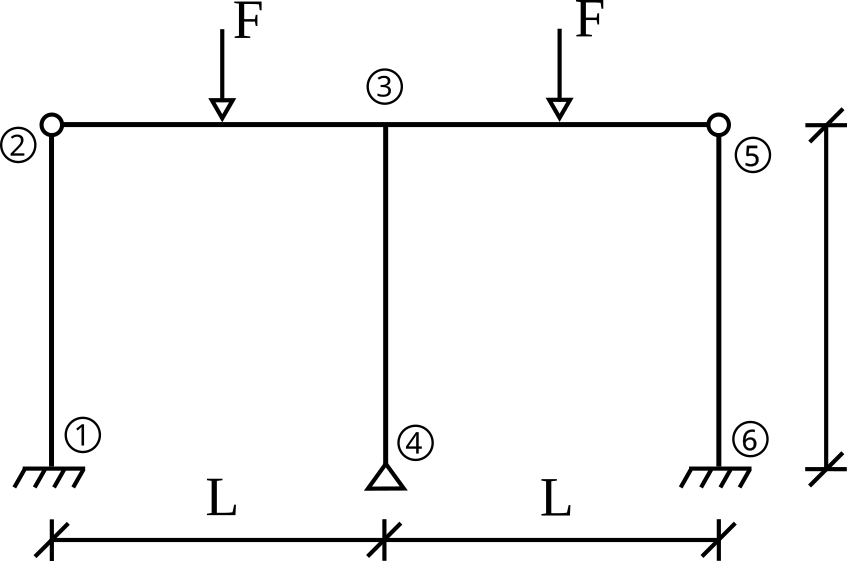

In [157]:
from IPython.display import display, Image
display(Image(filename="Ram_prirustkova_metoda_zadani.png", width=400))

Import potřebných knihoven

In [158]:
%matplotlib inline

import math
import numpy as np

from IPython.display import Markdown as md

import matplotlib.pyplot as plt

#!pip install sympy
from sympy import *
import sympy as smp

import matplotlib.patches as patches


## Řešení

Definice proměnných a jejich hodnot:

In [159]:
L = smp.symbols('L', real = True, positive = True)
H = smp.symbols('H', real = True, positive = True)
# I = smp.symbols('I', real = True, positive = True)

F = smp.symbols('F', real = True)

sigma0 = smp.symbols('\sigma_0', real = True)

val_L = 8
val_H = 8
val_M0 = 200 # [kNm]


## Vznik 1. plastického kloubu

Konstrukce i zatížení je symetrické, proto zde nebude žádná nenulová deformační neznámá. Průběh momentů i posouvajících sil na svislých prutech konstrukce  bude nulový. Řešení je tedy možné zredukovat na řešení spojitého podepřeného nosníku, který představuje horní příčle rámu.

Vyřešíme průběh momentů od refernečního jednotkového zatížení.

In [160]:
# Z tabulek pro ZDM:
M_32 = 3 / 16 * F * L
val_M32_ref1 = M_32.subs({F: 1, L: val_L})
print(f"Moment M32 od jednotkového zatížení: {val_M32_ref1:.3f} kNm")

Z_23 = -5 / 16 * F
val_Z_23_ref1 = Z_23.subs({F: 1})
print(f"Koncová síla Z23 od jednotkového zatížení: {val_Z_23_ref1:.3f} kN")

Z_32 = -11/16 * F
val_Z_32_ref1 = Z_32.subs({F: 1})
print(f"Koncová síla Z32 od jednotkového zatížení: {val_Z_32_ref1:.3f} kN")

M_05L = 5/16 * F * 0.5 * L
val_M05L_ref1 = M_05L.subs({F: 1, L: val_L})
print(f"Moment v místě působení síly od jednotkového zatížení: {val_M05L_ref1:.3f} kNm")

values = {"M32": val_M32_ref1, "M05L": val_M05L_ref1}

# Porovnání podle absolutních hodnot
max_moment_position = max(values, key=lambda k: abs(values[k]))
max_M_ref1 = values[max_moment_position]

print(f"Větší je hodnota momentu {max_moment_position}, tj. {max_M_ref1} kN.")
print("\n")
F_pl1 = val_M0 / max_M_ref1
print(f"\033[1mHodnota síly F v okamžiku vzniku 1. plast. kloubu je {F_pl1:.3f} kN.\033[0m")

Moment M32 od jednotkového zatížení: 1.500 kNm
Koncová síla Z23 od jednotkového zatížení: -0.312 kN
Koncová síla Z32 od jednotkového zatížení: -0.688 kN
Moment v místě působení síly od jednotkového zatížení: 1.250 kNm
Větší je hodnota momentu M32, tj. 1.50000000000000 kN.


Hodnota síly F v okamžiku vzniku 1. plast. kloubu je 133.333 kN.


In [161]:
val_M32_pl1 = 3 / 16 * F_pl1 * val_L
val_M05L_pl1 = 5/16 * F_pl1 * 0.5 * val_L
# Tisk s formátováním na 3 desetinná místa
print(f"Moment M32 v okamžiku vzniku 1. plast. kloubu: {val_M32_pl1:.3f} kNm")
print(f"Moment M05L v okamžiku vzniku 1. plast. kloubu: {val_M05L_pl1:.3f} kNm")

Moment M32 v okamžiku vzniku 1. plast. kloubu: 200.000 kNm
Moment M05L v okamžiku vzniku 1. plast. kloubu: 166.667 kNm


**Dopočet vnitřních sil a momentů pro okamžik vzniku 1. plastického kloubu**  
**Vykreslení průběhů momentů**






In [162]:
def Vykresleni_M(val_M2, val_MF, val_M3, val_M5):
    """
    Funkce pro vykreslení průběhu ohybových momentů na nosníku.

    val_M2, val_MF, val_M3, val_M5 : float
        Hodnoty momentů ve styčnících [kNm].
    """
    # Délky jednotlivých částí
    lengths = [val_L / 2, val_L / 2, val_L / 2, val_L / 2]  # délky mezi styčníky

    # Souřadnice styčníků (x-ové hodnoty)
    x_positions = [0]
    for length in lengths:
        x_positions.append(x_positions[-1] + length)

    # Hodnoty momentů ve styčnících [kNm]
    M_values = [val_M2, val_MF, val_M3, val_MF, val_M5]

    # Vykreslení průběhu momentů
    plt.plot(x_positions, M_values, color='blue', linestyle='-')

    # Vykreslení nosníku černě plnou čarou
    plt.plot([x_positions[0], x_positions[-1]], [0, 0], color='black', linewidth=1.5)

    # Přidání hodnot v místech styčníků
    for x, y in zip(x_positions, M_values):
        # Vypisujeme absolutní hodnotu (bez znaménka)
        if y != 0:
            plt.text(x, y, f"{abs(y):.2f}", fontsize=10, ha='center', va='top' if y > 0 else 'bottom')
        else:
            # Posunutí textu pro nulovou hodnotu
            plt.text(x, y + 5, f"{abs(y):.2f}", fontsize=10, ha='center', va='top', verticalalignment='top')

    # Svislé spojnice pro všechny styčníky s osou X
    for i, y in enumerate(M_values):
        plt.plot([x_positions[i], x_positions[i]], [0, y], color='blue', linestyle='-')

    # Titulek a popisky
    plt.title('Průběh ohybových momentů [kNm]')
    plt.xlabel('Délka nosníku [m]')

    # Odstranění zobrazení svislé osy
    plt.gca().yaxis.set_ticks([])  # Odstranění čárek
    plt.gca().yaxis.set_ticklabels([])  # Odstranění hodnot

    # Volba orientace osy y (kladná poloosa dolů - spodní vlákna)
    plt.gca().invert_yaxis()

    # Nastavení popisků na ose x v místech styčníků
    plt.xticks(x_positions)

    # Zobrazení grafu
    plt.show()




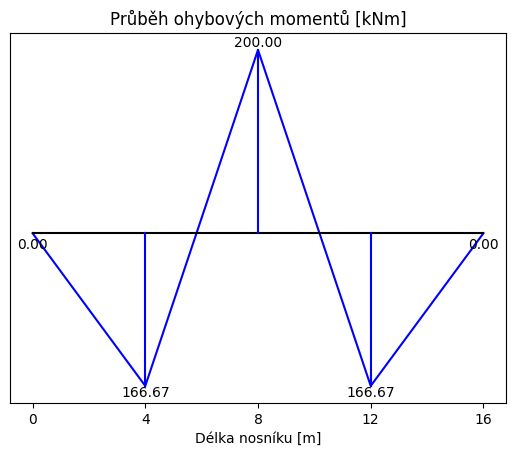

In [163]:
val_M2 = 0
val_MF = val_M05L_pl1
val_M3 = -val_M32_pl1
val_M5 = 0

Vykresleni_M(val_M2, val_MF, val_M3, val_M5)

**Vykreslení průběhu posouvajících sil**

In [164]:
def Vykresleni_V(val_V2F, val_VF2, val_VF3, val_V3F):
    """
    Funkce pro vykreslení průběhu posouvajících sil na nosníku.

    val_V2F, val_VF2, val_VF3, val_V3F : float
        Hodnoty posouvajících sil ve styčnících [kN].
    """
    # Délky jednotlivých částí
    lengths = [val_L / 2, val_L / 2, val_L / 2, val_L / 2]  # délky mezi styčníky

    # Souřadnice styčníků (x-ové hodnoty)
    x_positions = []
    for i, length in enumerate(lengths):
        x_positions.append(sum(lengths[:i]))  # Levá hodnota pro styčník
        x_positions.append(sum(lengths[:i + 1]))  # Pravá hodnota pro styčník

    # Hodnoty posouvajících sil ve styčnících [kN]
    V_values = [val_V2F, val_VF2, val_VF3, val_V3F, -val_V3F, -val_VF3, -val_VF2, -val_V2F]

    # Vykreslení posouvajících sil
    plt.figure(figsize=(10, 5))

    # Vykreslení průběhu posouvajících sil (konstantní úseky)
    plt.plot(x_positions, V_values, color='green', linestyle='-')

    # Vykreslení nosníku černě plnou čarou
    plt.plot([x_positions[0], x_positions[-1]], [0, 0], color='black', linewidth=1.5)

    # Přidání hodnot ve styčnících
    for x, y in zip(x_positions, V_values):
        plt.text(x, y + (2 if y > 0 else -2), f"{y:.2f}", fontsize=10, ha='center', va='bottom' if y > 0 else 'top')

    # Svislé spojnice pro všechny styčníky s osou X
    for i, y in enumerate(V_values):
        plt.plot([x_positions[i], x_positions[i]], [0, y], color='green', linestyle='-')

    # Titulek a popisky
    plt.title('Průběh posouvajících sil [kN]')
    plt.xlabel('Délka nosníku [m]')

    # Odstranění zobrazení svislé osy
    plt.gca().yaxis.set_ticks([])  # Odstranění čárek
    plt.gca().yaxis.set_ticklabels([])  # Odstranění hodnot

    # Nastavení popisků na ose x v místech styčníků
    plt.xticks(x_positions)

    # Zobrazení grafu
    plt.show()

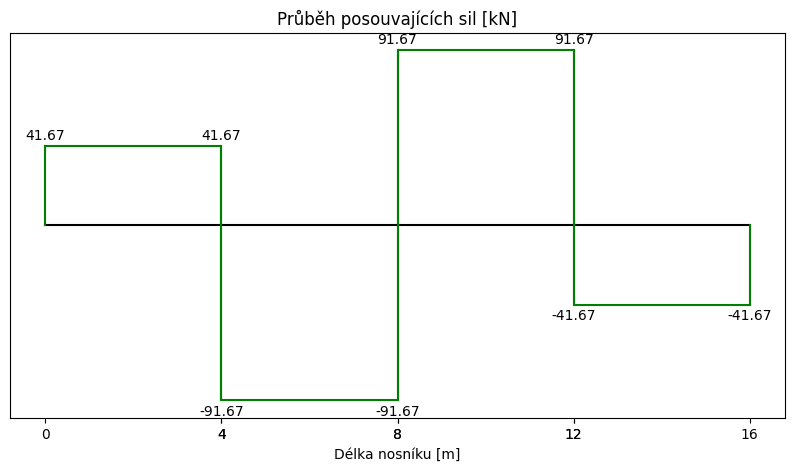

In [165]:
val_V2F = val_MF / (val_L/2)
val_VF2 = val_V2F
val_VF3 = val_V2F - F_pl1
val_V3F = val_VF3

Vykresleni_V(val_V2F, val_VF2, val_VF3, val_V3F)

## Vznik 2. plastického kloubu

Pro další výpočet je nutné změnit statické schéma, do místa vzniku plastického kloubu umístíme kloub a vykreslíme průběh přírůstku momentů od referenčního zatížení na konstrukci s upraveným schématem.
Opět stačí řešit jen jednu polvinu příčle, jeden vodorovný prut (symetrie).

In [166]:
delta_MF = val_M0 - val_M05L_pl1

delta_F = delta_MF / (val_L/4*1)
print(f"Přírůstek síly F v okamžiku vzniku 2. plast. kloubu je {delta_F:.3f} kN.")

print("\n")
F_pl2 = F_pl1 + delta_F
print(f"\033[1mHodnota síly F v okamžiku vzniku 2. plast. kloubu je {F_pl2:.3f} kN.\033[0m")

Přírůstek síly F v okamžiku vzniku 2. plast. kloubu je 16.667 kN.


Hodnota síly F v okamžiku vzniku 2. plast. kloubu je 150.000 kN.


**Vykreslení průběhů momentů**

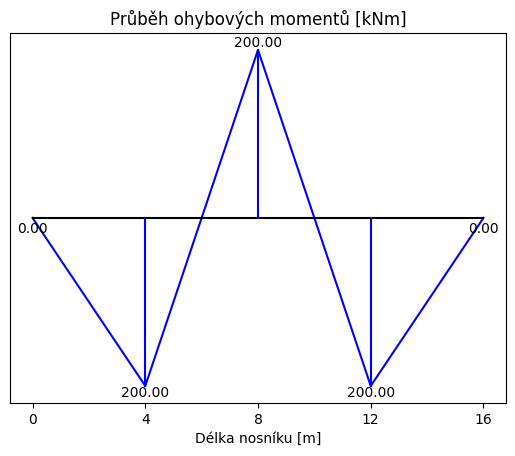

In [167]:
val_M2 = 0
val_MF = val_M0
val_M3 = -val_M0
val_M5 = 0

Vykresleni_M(val_M2, val_MF, val_M3, val_M5)

**Vykreslení průběhů posouvajících sil**

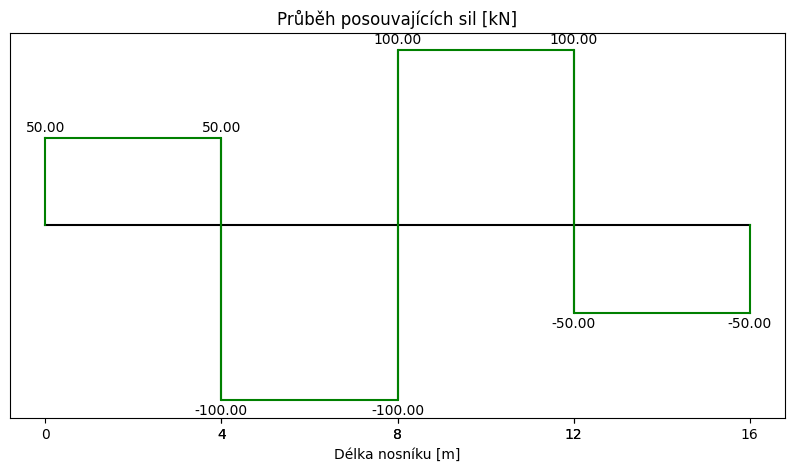

In [168]:
val_V2F = val_MF / (val_L/2)
val_VF2 = val_V2F
val_VF3 = val_V2F - F_pl2
val_V3F = val_VF3

Vykresleni_V(val_V2F, val_VF2, val_VF3, val_V3F)
